#**W06 - Random Forest and Gradient Boosting Decision Tree**

- Catherine Elina Santoso / 0706022310009
- Jacqlyn Chen / 0706022310042

In [1]:
# import library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree

#**Part A - Data Preprocessing and EDA**

In [2]:
# load dataset
pd.set_option('display.max_columns', None)
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/Bank%20(1).csv"
df = pd.read_csv(url, sep=';')
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
# get info from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
# get statistical info from dataset
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [5]:
# cek missing value
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#Visualizations



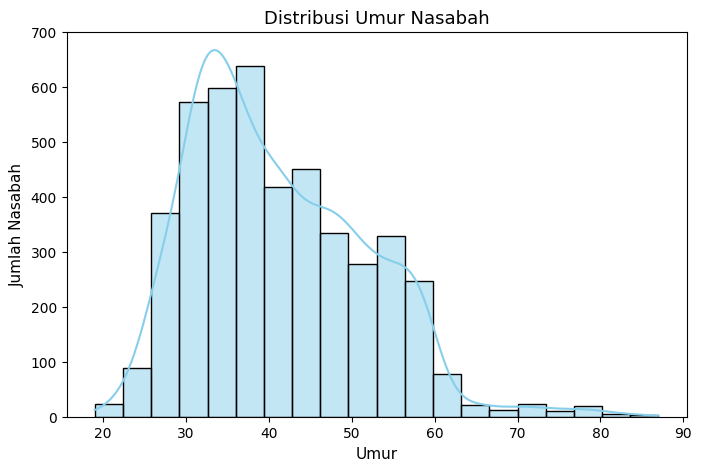

Interpretasi:
Dari visualisasi di atas terlihat bahwa sebagian besar nasabah berada pada rentang usia 30 hingga 40 tahun. Hal ini menunjukkan bahwa 
kampanye pemasaran bank terutama menjangkau kelompok usia produktif yang umumnya memiliki stabilitas finansial dan potensi lebih tinggi 
untuk membuka deposito berjangka.


In [6]:
# Visualisasi Distribusi Umur Nasabah
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='age', bins=20, kde=True, color='skyblue')
plt.title('Distribusi Umur Nasabah', fontsize=13)
plt.xlabel('Umur', fontsize=11)
plt.ylabel('Jumlah Nasabah', fontsize=11)
plt.show()

# Interpretasi (Insight)
print("Interpretasi:")
print("Dari visualisasi di atas terlihat bahwa sebagian besar nasabah berada pada rentang usia 30 hingga 40 tahun. Hal ini menunjukkan bahwa \n"
"kampanye pemasaran bank terutama menjangkau kelompok usia produktif yang umumnya memiliki stabilitas finansial dan potensi lebih tinggi \n"
"untuk membuka deposito berjangka.")

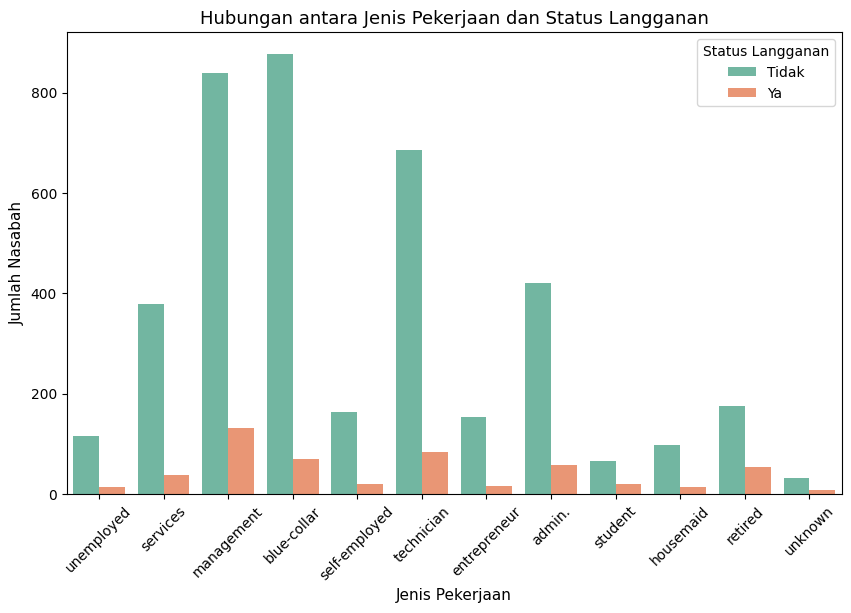

Interpretasi:
Dari visualisasi terlihat bahwa sebagian besar nasabah berasal dari kelompok pekerjaan 'blue-collar' dan 'management'. Namun, 
proporsi nasabah yang berlangganan produk deposito (y = ya) terlihat lebih tinggi pada kelompok 'management' dan 'technician' 
dibandingkan dengan jenis pekerjaan lain. Hal ini menunjukkan bahwa jenis pekerjaan yang berhubungan dengan pendapatan dan stabilitas 
finansial dapat memengaruhi keputusan seseorang untuk berlangganan produk deposito.


In [7]:
# Visualisasi Hubungan Pekerjaan Nasabah terhadap Status Langganan
plt.figure(figsize=(10,6))
sns.countplot(x='job', hue='y', data=df, palette='Set2')
plt.title('Hubungan antara Jenis Pekerjaan dan Status Langganan', fontsize=13)
plt.xlabel('Jenis Pekerjaan', fontsize=11)
plt.ylabel('Jumlah Nasabah', fontsize=11)
plt.xticks(rotation=45)
plt.legend(title='Status Langganan', labels=['Tidak', 'Ya'])
plt.show()

# Interpretasi (Insight)
print("Interpretasi:")
print("Dari visualisasi terlihat bahwa sebagian besar nasabah berasal dari kelompok pekerjaan 'blue-collar' dan 'management'. Namun, \n"
"proporsi nasabah yang berlangganan produk deposito (y = ya) terlihat lebih tinggi pada kelompok 'management' dan 'technician' \n"
"dibandingkan dengan jenis pekerjaan lain. Hal ini menunjukkan bahwa jenis pekerjaan yang berhubungan dengan pendapatan dan stabilitas \n"
"finansial dapat memengaruhi keputusan seseorang untuk berlangganan produk deposito.")

/var/folders/qp/9d41pw055glbg836dczy53cr0000gn/T/ipykernel_91497/4279949659.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='y', data=df, palette='pastel')


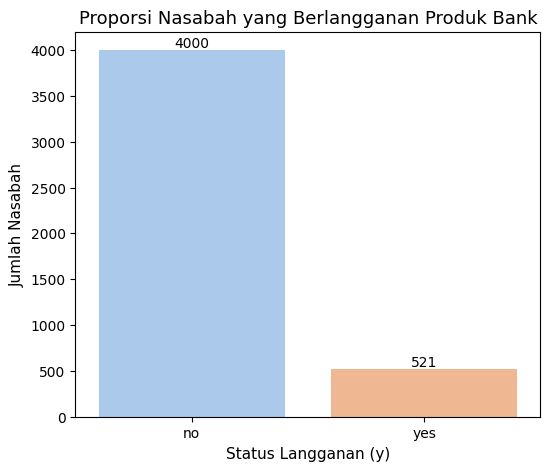

Interpretation:
Dari visualisasi terlihat bahwa jumlah nasabah yang tidak berlangganan jauh lebih banyak dibandingkan yang berlangganan. Hal ini menunjukkan
bahwa dataset bersifat imbalanced. Dalam konteks bisnis, hal ini berarti sebagian besar nasabah menolak tawaran deposito berjangka dari bank. 
Insight ini penting karena menunjukkan bahwa strategi promosi bank belum terlalu efektif, dan model machine learning nantinya harus memperhatikan 
ketidakseimbangan kelas ini agar prediksi lebih akurat.


In [8]:
# Visualisasi 1: Proporsi nasabah yang berlangganan dan tidak berlangganan produk bank
plt.figure(figsize=(6,5))
ax = sns.countplot(x='y', data=df, palette='pastel')
plt.title('Proporsi Nasabah yang Berlangganan Produk Bank', fontsize=13)
plt.xlabel('Status Langganan (y)', fontsize=11)
plt.ylabel('Jumlah Nasabah', fontsize=11)

# Tambahkan label di atas bar
for container in ax.containers:
    ax.bar_label(container)

plt.show()

# Interpretasi (Insight)
print("Interpretation:")
print("Dari visualisasi terlihat bahwa jumlah nasabah yang tidak berlangganan jauh lebih banyak dibandingkan yang berlangganan. Hal ini menunjukkan\n"
"bahwa dataset bersifat imbalanced. Dalam konteks bisnis, hal ini berarti sebagian besar nasabah menolak tawaran deposito berjangka dari bank. \n"
"Insight ini penting karena menunjukkan bahwa strategi promosi bank belum terlalu efektif, dan model machine learning nantinya harus memperhatikan \n"
"ketidakseimbangan kelas ini agar prediksi lebih akurat.")

#Data Preprocessing

In [9]:
# show unique values from dataset column
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'age': array([30, 33, 35, 59, 36, 39, 41, 43, 20, 31, 40, 56, 37, 25, 38, 42, 44,
        26, 55, 67, 53, 68, 32, 49, 78, 23, 52, 34, 61, 45, 48, 57, 54, 63,
        51, 29, 50, 27, 60, 28, 21, 58, 22, 46, 24, 77, 75, 47, 70, 65, 64,
        62, 66, 19, 81, 83, 80, 71, 72, 69, 79, 73, 86, 74, 76, 87, 84]),
 'job': array(['unemployed', 'services', 'management', 'blue-collar',
        'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
        'housemaid', 'retired', 'unknown'], dtype=object),
 'marital': array(['married', 'single', 'divorced'], dtype=object),
 'education': array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object),
 'default': array(['no', 'yes'], dtype=object),
 'balance': array([ 1787,  4789,  1350, ...,  -333, -3313,  1137], shape=(2353,)),
 'housing': array(['no', 'yes'], dtype=object),
 'loan': array(['no', 'yes'], dtype=object),
 'contact': array(['cellular', 'unknown', 'telephone'], dtype=object),
 'day': array([19, 11, 16,  3,  5, 23, 

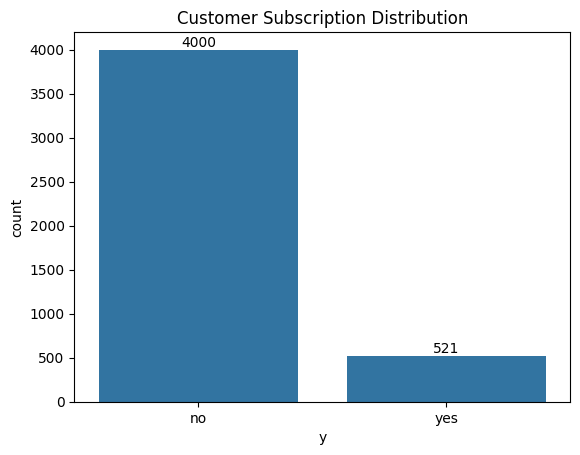

In [10]:
# show how many attrition
ax = sns.countplot(data=df, x='y')
plt.title('Customer Subscription Distribution')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# imbalance dataset but it's okay let us try firsttt

In [11]:
# duplicate df
df_encoded = df.copy()

from sklearn.preprocessing import OrdinalEncoder

# 1. Label encoding (biner)
# Columns with 2 category: yes/no

binary_map = {
    'default': {'no': 0, 'yes': 1},
    'housing': {'no': 0, 'yes': 1},
    'loan': {'no': 0, 'yes': 1},
    'y': {'no': 0, 'yes': 1}  # Target variable
}

for col, mapping in binary_map.items():
    df_encoded[col] = df_encoded[col].map(mapping)


# 2. Ordinal Encoding
education_mapping = {
    'unknown': 0,
    'primary': 1,
    'secondary': 2,
    'tertiary': 3
}
df_encoded['education'] = df_encoded['education'].map(education_mapping)

# 3. Nominal Encoding (OrdinalEncoder for job, marital, poutcome)
nominal_cols_ordinal = ['job', 'contact', 'month', 'marital', 'poutcome']
encoder_ordinal = OrdinalEncoder()
df_encoded[nominal_cols_ordinal] = encoder_ordinal.fit_transform(df_encoded[nominal_cols_ordinal])

# Build a mapping dictionary for OrdinalEncoder
encode_dict_ordinal = {}
for col, cats in zip(nominal_cols_ordinal, encoder_ordinal.categories_):
    encode_dict_ordinal[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary for OrdinalEncoder
import pprint
pprint.pprint(encode_dict_ordinal)

df_encoded.sample(n = 5)

{'contact': {'cellular': 0, 'telephone': 1, 'unknown': 2},
 'job': {'admin.': 0,
         'blue-collar': 1,
         'entrepreneur': 2,
         'housemaid': 3,
         'management': 4,
         'retired': 5,
         'self-employed': 6,
         'services': 7,
         'student': 8,
         'technician': 9,
         'unemployed': 10,
         'unknown': 11},
 'marital': {'divorced': 0, 'married': 1, 'single': 2},
 'month': {'apr': 0,
           'aug': 1,
           'dec': 2,
           'feb': 3,
           'jan': 4,
           'jul': 5,
           'jun': 6,
           'mar': 7,
           'may': 8,
           'nov': 9,
           'oct': 10,
           'sep': 11},
 'poutcome': {'failure': 0, 'other': 1, 'success': 2, 'unknown': 3}}


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2011,31,1.0,1.0,1,0,0,1,1,2.0,12,8.0,59,4,-1,0,3.0,0
1739,49,3.0,1.0,1,0,889,0,0,1.0,7,5.0,388,1,-1,0,3.0,1
4234,58,1.0,0.0,1,0,8218,1,0,0.0,31,5.0,124,10,-1,0,3.0,0
3586,43,1.0,1.0,2,0,2160,0,0,0.0,8,11.0,261,1,98,1,2.0,1
1120,48,2.0,1.0,2,0,725,0,1,0.0,10,5.0,105,1,-1,0,3.0,0


In [12]:
# checking encode result
df.loc[3050]

age                  31
job          technician
marital          single
education       unknown
default              no
balance             187
housing              no
loan                 no
contact        cellular
day                  17
month               jul
duration             86
campaign              1
pdays                -1
previous              0
poutcome        unknown
y                    no
Name: 3050, dtype: object

#Separate features and target
Subtask:

Define the features (X) and the target variable (y).

In [13]:
# Separate feature (X) and target (y)
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

In [14]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10.0,1.0,1,0,1787,0,0,0.0,19,10.0,79,1,-1,0,3.0
1,33,7.0,1.0,2,0,4789,1,1,0.0,11,8.0,220,1,339,4,0.0
2,35,4.0,2.0,3,0,1350,1,0,0.0,16,0.0,185,1,330,1,0.0
3,30,4.0,1.0,3,0,1476,1,1,2.0,3,6.0,199,4,-1,0,3.0
4,59,1.0,1.0,2,0,0,1,0,2.0,5,8.0,226,1,-1,0,3.0


In [15]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

#Split Data

Subtask:

Split the encoded data into training and testing sets.

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [17]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((3164, 16), (1357, 16))

In [18]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
565,40,9.0,1.0,2,0,56,1,1,0.0,29,4.0,194,1,247,1,0.0
3480,47,7.0,1.0,2,0,440,1,0,2.0,12,6.0,91,1,-1,0,3.0
2125,52,9.0,1.0,2,0,3554,0,1,0.0,8,5.0,89,1,-1,0,3.0
3452,31,0.0,1.0,2,0,0,1,0,0.0,29,5.0,82,5,-1,0,3.0
1667,33,1.0,1.0,2,0,-346,1,1,2.0,23,8.0,29,3,-1,0,3.0


In [19]:
X_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
4274,35,1.0,1.0,1,0,378,1,0,2.0,16,8.0,427,3,-1,0,3.0
72,31,4.0,2.0,3,0,6248,1,0,2.0,9,8.0,154,2,-1,0,3.0
1065,30,10.0,1.0,3,0,0,1,0,0.0,18,9.0,756,1,-1,0,3.0
3185,42,0.0,1.0,2,0,529,1,1,0.0,19,9.0,193,3,-1,0,3.0
130,41,1.0,1.0,1,0,168,1,0,0.0,18,9.0,187,3,-1,0,3.0


#**Part B: Model Development**

#Oversampling using SMOTENC

In [20]:
# using SMOTE-NC for dataset containing numerical and categorical features.

from imblearn.over_sampling import SMOTENC

# we should define the categorical features first to make oversampling more accurate
# The indices of the categorical features after one-hot encoding need to be updated.
# The categorical columns are now 'job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', and the one-hot encoded 'contact' and 'month' columns.
# Let's get the indices of these columns in the X DataFrame.
categorical_features_names = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome'] + [col for col in X.columns if 'contact_' in col or 'month_' in col]
categorical_features = [X.columns.get_loc(col) for col in categorical_features_names]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_resampled, y_resampled = smotenc.fit_resample(X, y)

# dont forget to always do partitioning AFTER undersampling/oversampling
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=0)

# check the shape of X_train and X_test
print(X_train.shape, X_test.shape)

(5600, 16) (2400, 16)


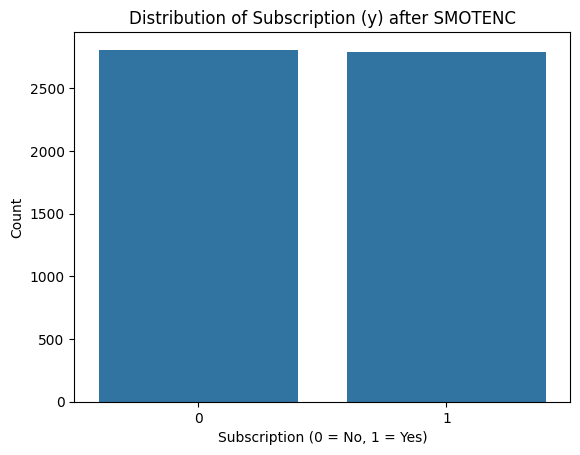

In [21]:
# just to visualize the distribution of target class after SMOTENC

sns.countplot(x=y_train)
plt.title('Distribution of Subscription (y) after SMOTENC')
plt.xlabel('Subscription (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

#Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2808
           1       1.00      1.00      1.00      2792

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1192
           1       0.88      0.90      0.89      1208

    accuracy                           0.89      2400
   macro avg       0.89      0.89      0.89      2400
weighted avg       0.89      0.89      0.89      2400



#KFold Cross Validation

In [23]:
# Lets split the data into 5 folds.
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
# The folds are made by preserving the percentage of samples for each class.
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split() method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 3616, Test set:905
Fold:2, Train set: 3617, Test set:904
Fold:3, Train set: 3617, Test set:904
Fold:4, Train set: 3617, Test set:904
Fold:5, Train set: 3617, Test set:904


In [24]:
from sklearn.tree import DecisionTreeClassifier

score = cross_val_score(DecisionTreeClassifier(random_state= 42), X, y, cv= kf, scoring="f1")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.43137255 0.3919598  0.44343891 0.44247788 0.41121495]
Average score: 0.42


In [25]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to tune the hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'random_state': [0, 41, 42]
}

dtree_clf = DecisionTreeClassifier() # Initialize a decision tree classifier
grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification
grid_search.fit(X_train, y_train)

best_dtree_clf = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred_test = best_dtree_clf.predict(X_test)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ........criterion=gini, max_depth=1, random_state=0; total time=   0.0s
[CV] END ........criterion=gini, max_depth=1, random_state=0; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, random_state=41; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, random_state=41; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, random_state=41; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, random_state=42; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, random_state=42; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, random_state=42; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, random_state=42; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, random_state=42; total time=   0.0s
[CV] END ........criterion=gini, max_depth=1, random_state=0; total time=   0.0s
[CV] END ........criterion=gini, max_depth=2, r

#Feature Importance

In [26]:
print("Feature importances:\n{}".format(tree.feature_importances_)) #function for feature importance

Feature importances:
[0.03861945 0.02647572 0.00833852 0.01424865 0.00054901 0.07434375
 0.01998733 0.03702728 0.13248549 0.05331021 0.09010629 0.3390861
 0.01681984 0.06581642 0.00423569 0.07855022]


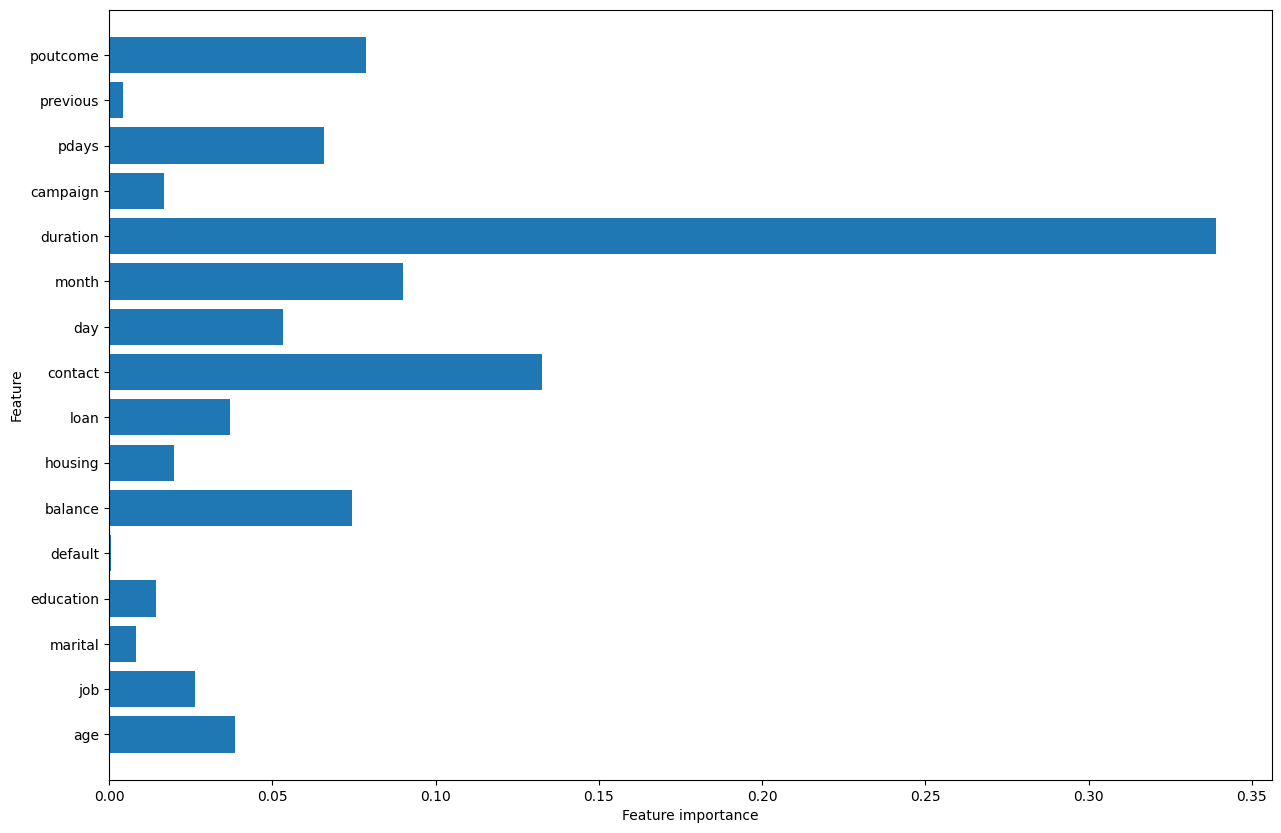

In [27]:
# visualize important features
def plot_feature_importances_attrition(model):
    plt.figure(figsize=(15,10))
    n_features = X_train.shape[1]  # Get the number of features from X_train
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns) # Use column names from X_train as labels
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_attrition(tree)

In [28]:
# Show feature importances greater than 0.05
feature_importances = pd.Series(tree.feature_importances_, index=X_train.columns)
important_features = feature_importances[feature_importances > 0.05].sort_values(ascending=False)
important_features

duration    0.339086
contact     0.132485
month       0.090106
poutcome    0.078550
balance     0.074344
pdays       0.065816
day         0.053310
dtype: float64

In [29]:
# using only important features for the prediction
important_features = ["duration", "balance", "pdays", "age", "poutcome", "job"]
X_importance = df_encoded[important_features] #input
y_importance = df_encoded['y'] #target

In [30]:
display(X_importance)
display(y_importance)

,duration,balance,pdays,age,poutcome,job
0,79,1787,-1,30,3.0,10.0
1,220,4789,339,33,0.0,7.0
2,185,1350,330,35,0.0,4.0
3,199,1476,-1,30,3.0,4.0
4,226,0,-1,59,3.0,1.0
...,...,...,...,...,...,...
4516,329,-333,-1,33,3.0,7.0
4517,153,-3313,-1,57,3.0,6.0
4518,151,295,-1,57,3.0,9.0
4519,129,1137,211,28,1.0,1.0


0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: int64

In [31]:
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
# oversampling againnn
categorical_features = [1, 2, 3, 4, 6, 7, 11]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_importance, y_importance = smotenc.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((3164, 16), (1357, 16))

In [32]:
X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(X_importance, y_importance, test_size=0.3, random_state=42)

importance_tree = DecisionTreeClassifier(random_state=42)
importance_tree.fit(X_train_importance, y_train_importance)

y_pred_train_importance = importance_tree.predict(X_train_importance)
y_pred_test_importance = importance_tree.predict(X_test_importance)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_importance))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_importance))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2794
           1       1.00      1.00      1.00      2806

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1206
           1       0.88      0.89      0.88      1194

    accuracy                           0.88      2400
   macro avg       0.88      0.88      0.88      2400
weighted avg       0.88      0.88      0.88      2400



#Random Forest

###No Tuning

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# === Split data (sama seperti Decision Tree) ===
X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(
    X_importance, y_importance, test_size=0.3, random_state=42
)

# === Inisialisasi model Random Forest (tanpa tuning) ===
rf_default = RandomForestClassifier(random_state=42)
rf_default.fit(X_train_importance, y_train_importance)

# === Prediksi ===
y_pred_train_rf_default = rf_default.predict(X_train_importance)
y_pred_test_rf_default = rf_default.predict(X_test_importance)

# === Classification Report ===
print("\n=== Classification Report (Training Set) - Random Forest (Default) ===")
print(classification_report(y_train_importance, y_pred_train_rf_default, digits=4))

print("\n=== Classification Report (Test Set) - Random Forest (Default) ===")
print(classification_report(y_test_importance, y_pred_test_rf_default, digits=4))



=== Classification Report (Training Set) - Random Forest (Default) ===
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      2794
           1     1.0000    1.0000    1.0000      2806

    accuracy                         1.0000      5600
   macro avg     1.0000    1.0000    1.0000      5600
weighted avg     1.0000    1.0000    1.0000      5600


=== Classification Report (Test Set) - Random Forest (Default) ===
              precision    recall  f1-score   support

           0     0.9268    0.9245    0.9257      1206
           1     0.9240    0.9263    0.9251      1194

    accuracy                         0.9254      2400
   macro avg     0.9254    0.9254    0.9254      2400
weighted avg     0.9254    0.9254    0.9254      2400



###Hyperparameter Tuning

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_tuned = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=rf_tuned,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_importance, y_train_importance)

print("\nBest Parameters from Grid Search:")
print(grid_search.best_params_)

# === Gunakan model terbaik untuk prediksi ===
best_rf = grid_search.best_estimator_

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5

In [35]:
y_pred_train_rf_tuned = best_rf.predict(X_train_importance)
y_pred_test_rf_tuned = best_rf.predict(X_test_importance)

# === Classification Report ===
print("\n=== Classification Report (Training Set) - Random Forest (Tuned) ===")
print(classification_report(y_train_importance, y_pred_train_rf_tuned, digits=4))

print("\n=== Classification Report (Test Set) - Random Forest (Tuned) ===")
print(classification_report(y_test_importance, y_pred_test_rf_tuned, digits=4))


=== Classification Report (Training Set) - Random Forest (Tuned) ===
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      2794
           1     1.0000    1.0000    1.0000      2806

    accuracy                         1.0000      5600
   macro avg     1.0000    1.0000    1.0000      5600
weighted avg     1.0000    1.0000    1.0000      5600


=== Classification Report (Test Set) - Random Forest (Tuned) ===
              precision    recall  f1-score   support

           0     0.9359    0.9204    0.9281      1206
           1     0.9209    0.9363    0.9286      1194

    accuracy                         0.9283      2400
   macro avg     0.9284    0.9284    0.9283      2400
weighted avg     0.9285    0.9283    0.9283      2400



#Gradient Boosting

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# === Split data (gunakan data yang sama seperti sebelumnya) ===
X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(
    X_importance, y_importance, test_size=0.3, random_state=42
)

# === Inisialisasi model Gradient Boosting (tanpa tuning) ===
gb_default = GradientBoostingClassifier(random_state=42)

# === Latih model ===
gb_default.fit(X_train_importance, y_train_importance)

# === Prediksi ===
y_pred_train_gb_default = gb_default.predict(X_train_importance)
y_pred_test_gb_default = gb_default.predict(X_test_importance)

# === Classification Report ===
print("\n=== Classification Report (Training Set) - Gradient Boosting (Default) ===")
print(classification_report(y_train_importance, y_pred_train_gb_default, digits=4))

print("\n=== Classification Report (Test Set) - Gradient Boosting (Default) ===")
print(classification_report(y_test_importance, y_pred_test_gb_default, digits=4))



=== Classification Report (Training Set) - Gradient Boosting (Default) ===
              precision    recall  f1-score   support

           0     0.9247    0.9320    0.9283      2794
           1     0.9318    0.9244    0.9281      2806

    accuracy                         0.9282      5600
   macro avg     0.9282    0.9282    0.9282      5600
weighted avg     0.9282    0.9282    0.9282      5600


=== Classification Report (Test Set) - Gradient Boosting (Default) ===
              precision    recall  f1-score   support

           0     0.9065    0.9163    0.9113      1206
           1     0.9145    0.9045    0.9095      1194

    accuracy                         0.9104      2400
   macro avg     0.9105    0.9104    0.9104      2400
weighted avg     0.9105    0.9104    0.9104      2400



###Hyperparameter Tuning

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

gb_tuned = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search_gb = GridSearchCV(
    estimator=gb_tuned,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search_gb.fit(X_train_importance, y_train_importance)

# === Tampilkan parameter terbaik ===
print("\nBest Parameters from Grid Search (Gradient Boosting):")
print(grid_search_gb.best_params_)

# === Gunakan model terbaik ===
best_gb = grid_search_gb.best_estimator_

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=2

In [38]:
y_pred_train_gb_tuned = best_gb.predict(X_train_importance)
y_pred_test_gb_tuned = best_gb.predict(X_test_importance)

# === Classification Report ===
print("\n=== Classification Report (Training Set) - Gradient Boosting (Tuned) ===")
print(classification_report(y_train_importance, y_pred_train_gb_tuned, digits=4))

print("\n=== Classification Report (Test Set) - Gradient Boosting (Tuned) ===")
print(classification_report(y_test_importance, y_pred_test_gb_tuned, digits=4))


=== Classification Report (Training Set) - Gradient Boosting (Tuned) ===
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      2794
           1     1.0000    1.0000    1.0000      2806

    accuracy                         1.0000      5600
   macro avg     1.0000    1.0000    1.0000      5600
weighted avg     1.0000    1.0000    1.0000      5600


=== Classification Report (Test Set) - Gradient Boosting (Tuned) ===
              precision    recall  f1-score   support

           0     0.9320    0.9436    0.9378      1206
           1     0.9423    0.9305    0.9364      1194

    accuracy                         0.9371      2400
   macro avg     0.9372    0.9371    0.9371      2400
weighted avg     0.9371    0.9371    0.9371      2400



#**Part C - Model Evaluation**

#Confusion Matrices

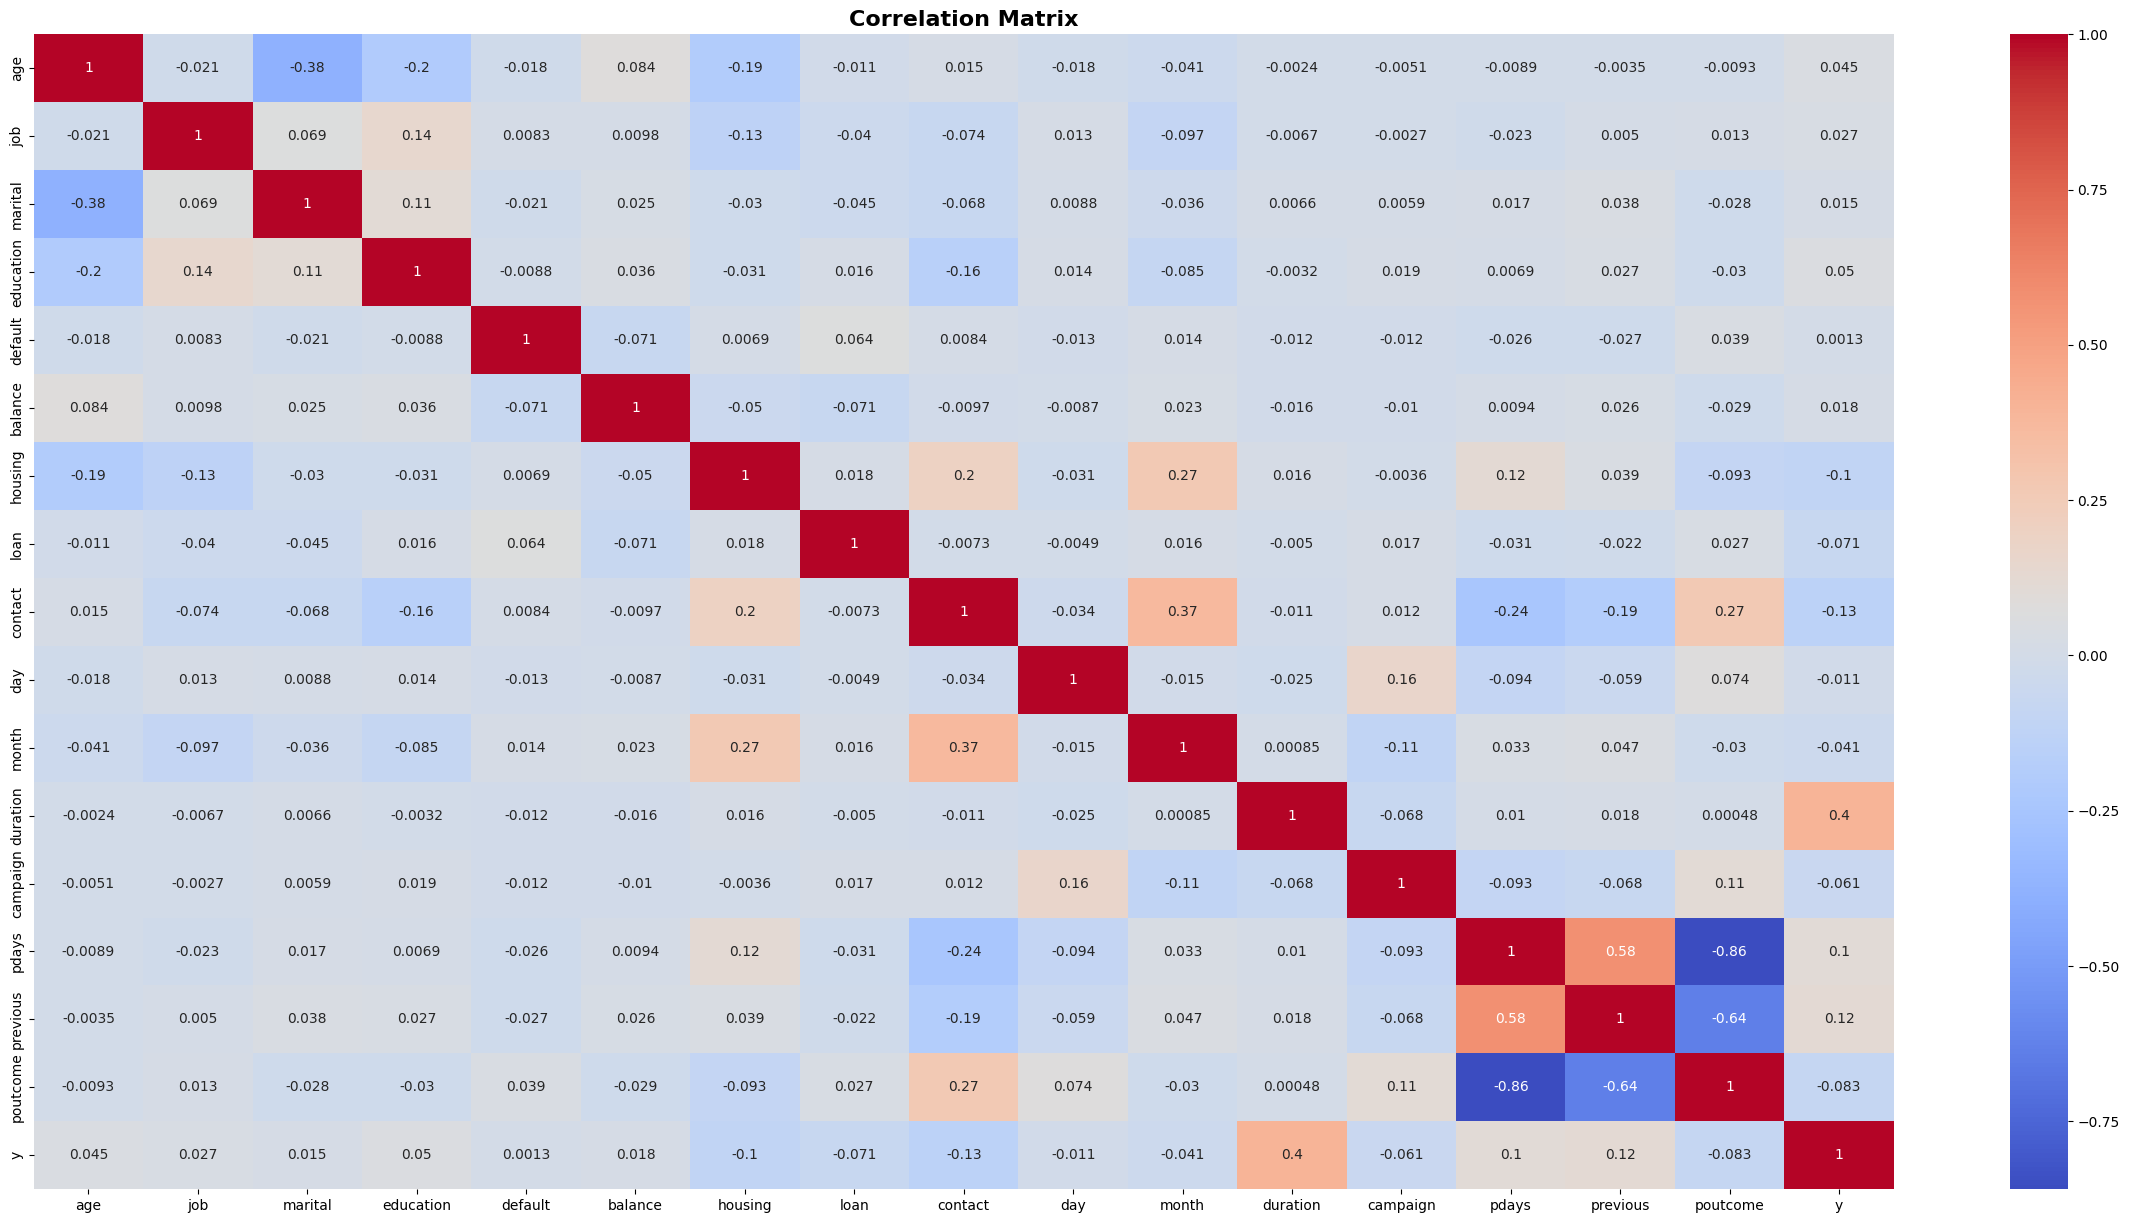

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih kolom numerik dari dataset
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Hitung korelasi antar fitur numerik
corr = numeric_cols.corr()

# Visualisasi correlation matrix menggunakan heatmap
plt.figure(figsize=(30, 15))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
plt.show()

Heatmap di atas menunjukkan korelasi antar seluruh fitur setelah proses encoding. 
Beberapa fitur memiliki korelasi tinggi satu sama lain, yang dapat membantu dalam memahami hubungan antar variabel. 
Fitur dengan korelasi tinggi terhadap target `y` menunjukkan pengaruh besar terhadap keputusan nasabah dalam berlangganan produk bank.

#Comparison Table Decision Tree, Random Forest & Gradient Boosting

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Hitung semua metrik untuk ketiga model
acc_dt = accuracy_score(y_test_importance, y_pred_test_importance)
prec_dt = precision_score(y_test_importance, y_pred_test_importance, zero_division=0)
rec_dt = recall_score(y_test_importance, y_pred_test_importance, zero_division=0)
f1_dt = f1_score(y_test_importance, y_pred_test_importance, zero_division=0)

acc_rf = accuracy_score(y_test_importance, y_pred_test_importance_rf)
prec_rf = precision_score(y_test_importance, y_pred_test_importance_rf, zero_division=0)
rec_rf = recall_score(y_test_importance, y_pred_test_importance_rf, zero_division=0)
f1_rf = f1_score(y_test_importance, y_pred_test_importance_rf, zero_division=0)

acc_gb = accuracy_score(y_test_importance, y_pred_test_importance_gb)
prec_gb = precision_score(y_test_importance, y_pred_test_importance_gb, zero_division=0)
rec_gb = recall_score(y_test_importance, y_pred_test_importance_gb, zero_division=0)
f1_gb = f1_score(y_test_importance, y_pred_test_importance_gb, zero_division=0)

# tabel perbandingan
results_importance = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [acc_dt, acc_rf, acc_gb],
    'Precision': [prec_dt, prec_rf, prec_gb],
    'Recall': [rec_dt, rec_rf, rec_gb],
    'F1-score': [f1_dt, f1_rf, f1_gb]
})
display(results_importance)


,Model,Accuracy,Precision,Recall,F1-score
0,Decision Tree,0.884167,0.879768,0.888610,0.884167
1,Random Forest,0.925417,0.923977,0.926298,0.925136
2,Gradient Boosting,0.910417,0.914479,0.904523,0.909474


#**Part D – Discussion & Insights**

**Which model performed best overall?**

Based on the evaluation metrics, the Random Forest model achieved the best overall performance among all models tested. It obtained the highest accuracy (92.54%) and F1-score (92.51%), indicating that it can classify both subscribing and non-subscribing customers more effectively than the Decision Tree and Gradient Boosting models. The Random Forest’s ability to aggregate predictions from multiple decision trees reduces overfitting and improves model generalization, resulting in more stable and reliable performance.

**Did ensemble methods (RF, XGBoost) improve performance compared to a single Desicion Tree?**

Yes, the ensemble methods (Random Forest and Gradient Boosting) significantly improved performance compared to the single Decision Tree model.
While the Decision Tree achieved an accuracy of 88.41% and an F1-score of 88.42%, both ensemble models outperformed it — Random Forest reached 92.54%, and Gradient Boosting achieved 91.04%.
This improvement demonstrates the effectiveness of ensemble learning, where combining multiple weak learners helps reduce variance and bias, leading to more accurate and robust predictions.
Therefore, ensemble methods provide superior performance and greater stability compared to a single Decision Tree classifier.

**How Could the bank use these insights to refine its marketing strategy?**

Based on the evaluation results, the Random Forest model achieved the highest and most stable performance among all tested algorithms, with an accuracy of 92.54% and an F1-score of 92.51%. This demonstrates that the model is highly effective at distinguishing between customers who are likely to subscribe to the bank’s financial products and those who are not. By leveraging the predictive power and insights derived from this model, the bank can strategically refine its marketing approach in the following ways:
Target High-Potential Customer Segments More Effectively
1. The Random Forest model enables the bank to accurately identify customers with the highest likelihood of responding positively to marketing campaigns. By focusing marketing resources on these high-probability segments, the bank can reduce outreach to uninterested customers, minimize marketing costs, and significantly improve overall conversion rates.
2. Personalize Marketing and Communication Strategies
Key predictive features — such as contact duration, number of campaign attempts, and job type — have been identified as strong influencers of customer decisions. Customers with longer contact durations and multiple campaign interactions are more likely to subscribe. The bank can use this information to design personalized communication strategies, adjusting message tone, timing, and frequency to fit each customer’s profile and level of engagement.
3. Optimize Marketing Resource Allocation
With reliable model predictions, the bank can prioritize marketing efforts toward customers with higher predicted probabilities of conversion. This ensures a data-driven allocation of resources, enhancing efficiency and yielding a higher return on investment (ROI) for marketing activities.
Adopt Data-Driven Decision Making to Improve Campaign Effectiveness
4. The results indicate that ensemble models (Random Forest and Gradient Boosting) outperform the single Decision Tree model in both accuracy and stability. This highlights the importance of using machine learning models that can generalize better and adapt to new data. The bank can integrate such predictive models into its marketing decision process, continuously updating and refining strategies based on customer behavior and campaign outcomes.

- Conclusion
In summary, the insights from the Random Forest model can help the bank implement a more precise, personalized, and data-driven marketing strategy. By targeting the right customers and optimizing campaign design based on key influencing factors, the bank can enhance campaign success rates, reduce marketing expenses, and strengthen customer engagement.